# Attempt 2

This is attempt #2 at creating a natural language base model

Instead of handling tokenization on your own, you let keras handle that for you.

## Getting dependencies

In [ ]:
# !git clone https://github.com/ivanrj7j/NLP2
# !pip install tokenizers

In [3]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np

In [4]:
from DataLoader import TrainLoader

In [5]:
from keras.layers import Bidirectional, LSTM, Embedding, Dense, Dropout

In [6]:
from keras.models import Sequential, Model

In [7]:
from keras.callbacks import EarlyStopping

In [8]:
from keras.optimizers import Adam

In [26]:
from tokenizers import Tokenizer as t

## Loading data

In [11]:
trainDataset = TrainLoader(32, 25, "/content/NLP2/data/tokenizer/tokens.json", "/content/NLP2/data/preprocessed/train.csv", )
validDataset = TrainLoader(32, 25, "/content/NLP2/data/tokenizer/tokens.json", "/content/NLP2/data/preprocessed/valid.csv", )

# Defining Model

In [10]:
model = Sequential([
    Embedding(30003, 1000),
    Dropout(0.8),
    Bidirectional(LSTM(100)),
    Dropout(0.4),
    Dense(30003, "softmax")
    ])

Experimental: check this out https://lilianweng.github.io/posts/2017-10-15-word-embedding/

In [12]:
model.compile("adam", "categorical_crossentropy", "accuracy")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 1000)        30003000  
                                                                 
 dropout (Dropout)           (None, None, 1000)        0         
                                                                 
 bidirectional (Bidirection  (None, 200)               880800    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 30003)             6030603   
                                                                 
Total params: 36914403 (140.82 MB)
Trainable params: 36914403 (140.82 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [14]:
earlyStopper = EarlyStopping()

In [15]:
history = model.fit(trainDataset.getTensorflowDataset(), epochs=50, callbacks=[earlyStopper], validation_data=validDataset.getTensorflowDataset())

Epoch 1/50
5166/5166 [==============================] - 290s 54ms/step - loss: 5.9037 - accuracy: 0.2845 - val_loss: 5.4351 - val_accuracy: 0.3174
Epoch 2/50
5166/5166 [==============================] - 246s 48ms/step - loss: 5.2118 - accuracy: 0.3233 - val_loss: 5.2391 - val_accuracy: 0.3365
Epoch 3/50
5166/5166 [==============================] - 251s 49ms/step - loss: 4.9240 - accuracy: 0.3404 - val_loss: 5.1691 - val_accuracy: 0.3470
Epoch 4/50
5166/5166 [==============================] - 249s 48ms/step - loss: 4.7453 - accuracy: 0.3501 - val_loss: 5.1472 - val_accuracy: 0.3522
Epoch 5/50
5166/5166 [==============================] - 246s 48ms/step - loss: 4.6128 - accuracy: 0.3577 - val_loss: 5.1335 - val_accuracy: 0.3564
Epoch 6/50
5166/5166 [==============================] - 247s 48ms/step - loss: 4.5227 - accuracy: 0.3626 - val_loss: 5.1464 - val_accuracy: 0.3604


In [16]:
model.save("/content/drive/MyDrive/NLP Models/bidirectional.keras")

In [17]:
from matplotlib import pyplot as plt

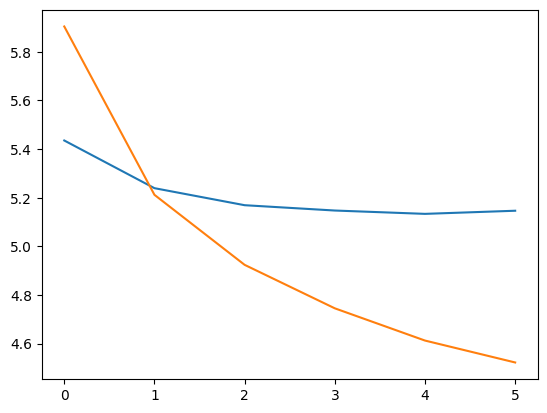

In [18]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])

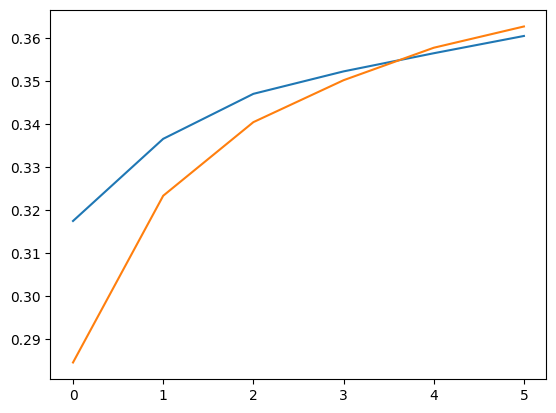

In [19]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])

In [52]:
top_words = model.weights[0].numpy().argmax(axis=1)[-20:]

In [27]:
tokenizer = t.from_file("/content/NLP2/data/tokenizer/tokens.json")

In [53]:
tokenizer.decode(top_words)

'found ##ets ##ister country ##il _ ##any car ##ee ##ational The ##ere Mar ##00 fe government ##ets country ä ##uc'

Fortunately, the model didnt learn to always predict `the` after a word

In [31]:
def prepareInput(text:str) -> np.ndarray:
  tokens = np.array(tokenizer.encode(text).ids)

  if tokens.shape[0] < 25:
    tokens = np.pad(tokens, 25-tokens.shape[0], "constant")

  return tokens[-25:]

In [36]:
def predictText(start:str, limit:int=100):
  tokens = prepareInput(start)
  sentence = start
  for _ in range(limit):
    prediction = model.predict(prepareInput("Media").reshape(1, -1), verbose=False).argmax(axis=1)
    tokens = np.hstack((tokens, prediction))[-25:]
    sentence += " " + tokenizer.decode(prediction).replace('##', "")
    print(sentence, end="\r")
  print(tokens)
  return sentence

In [42]:
tokenizer.decode([11])

'.'

In [41]:
predictText("NDA cleared more forestland")

[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11]


'NDA cleared more forestland . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .'

In [38]:
model.weights[0].numpy()[11]

array([-3.41917537e-02, -7.88571779e-03,  5.98518327e-02, -3.54569972e-01,
        4.89931228e-03,  3.15519333e-01,  1.43009216e-01,  1.85680091e-01,
        4.56575304e-02, -5.11725917e-02, -2.23605037e-01, -2.95493364e-01,
        1.84612408e-01,  5.88005520e-02, -1.20413616e-01,  1.57268181e-01,
        3.40173580e-02, -8.60684514e-02,  6.15965649e-02,  1.05822340e-01,
        1.50400117e-01,  1.48345515e-01, -9.96255800e-02,  1.41415745e-01,
        3.48683327e-01, -2.56958697e-02, -2.27705106e-01,  5.00842668e-02,
        2.34871320e-02, -1.03040591e-01,  8.39054063e-02,  2.37643495e-02,
       -9.46768224e-02,  6.61598071e-02, -9.07487944e-02, -1.96195364e-01,
        2.12249935e-01,  2.03015476e-01,  1.45426556e-01,  7.97933191e-02,
       -7.73835108e-02,  3.54808234e-02, -1.61401570e-01, -9.70863551e-02,
        2.36601699e-02,  1.34221137e-01,  1.54447332e-01, -2.55455691e-02,
       -1.17917508e-01,  2.36953162e-02, -1.02574028e-01,  2.07708120e-01,
        2.80432969e-01,  

Found the problem with the model: The training data had whole sentences, since most of the sentences end with `.`, the model learned to always predict `.` to get high accuracy.